<a href="https://colab.research.google.com/github/seyeon0815/Project/blob/main/plot_tree_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 목표
- sklearn.tree.plot_tree의 색상을 변경해보자!

In [ ]:
!pip install -U matplotlib

     |████████████████████████████████| 11.2 MB 24.5 MB/s 
     |████████████████████████████████| 899 kB 43.4 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


1.0.2
3.5.1
(150, 4) (150,)
feature names ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
class names ['setosa' 'versicolor' 'virginica']


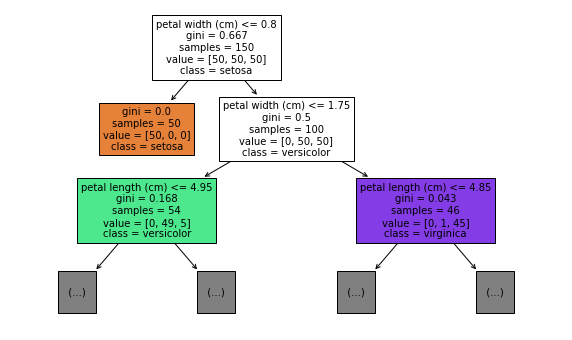

In [ ]:
%matplotlib inline 

import sklearn
print(sklearn.__version__)
import matplotlib
print(matplotlib.__version__)

# 필수 라이브러리 불러오기
from sklearn.datasets import load_iris
from sklearn import tree 
import matplotlib.pyplot as plt

# 데이터 불러오기
iris = load_iris()
print(iris.data.shape, iris.target.shape)
print("feature names", iris.feature_names)
print("class names", iris.target_names)

# 모형 학습 및 plot_tree 그래프 구현
dt = tree.DecisionTreeClassifier(random_state=0)
dt.fit(iris.data, iris.target)

fig, ax = plt.subplots(figsize=(10, 6))
ax = tree.plot_tree(dt, max_depth = 2, filled=True, feature_names = iris.feature_names, class_names = iris.target_names)
plt.show()

# plot_tree 내부 구조 파악
- Annotation 클래스인 것 확인

<class 'matplotlib.text.Annotation'>
<class 'matplotlib.text.Annotation'>
<class 'matplotlib.text.Annotation'>
<class 'matplotlib.text.Annotation'>
<class 'matplotlib.text.Annotation'>
<class 'matplotlib.text.Annotation'>
<class 'matplotlib.text.Annotation'>
<class 'matplotlib.text.Annotation'>
<class 'matplotlib.text.Annotation'>


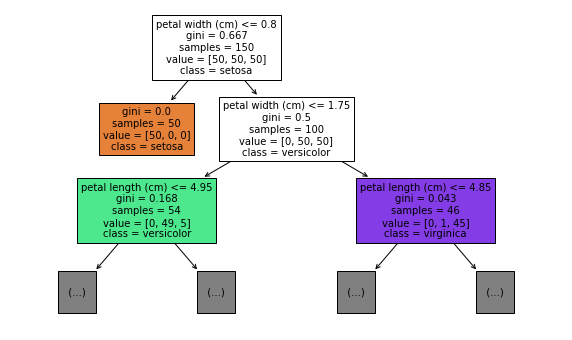

In [ ]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(10, 6))
ax = tree.plot_tree(dt, max_depth = 2, 
                    filled=True, 
                    feature_names = iris.feature_names, 
                    class_names = iris.target_names)

for i in range(0, len(ax)):
  print(type(ax[i]))

get_bbox_patch

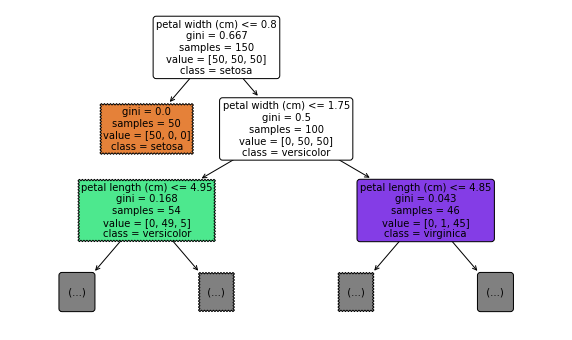

In [ ]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(10, 6))
ax = tree.plot_tree(dt, max_depth = 2, 
                    filled=True, 
                    feature_names = iris.feature_names, 
                    class_names = iris.target_names)

for i in range(0, len(ax)):
  if i % 2 == 0:
    # set_boxtyle 적용
    ax[i].get_bbox_patch().set_boxstyle("round", pad=0.3)
  else:
    ax[i].get_bbox_patch().set_boxstyle("sawtooth", pad=0.3)

In [ ]:
print("impurity", dt.tree_.impurity[:3])
print("--")
print("value", dt.tree_.value[:3])

impurity [0.66666667 0.         0.5       ]
--
value [[[50. 50. 50.]]

 [[50.  0.  0.]]

 [[ 0. 50. 50.]]]


In [ ]:
import numpy as np 

colors = ["indigo", "violet", "crimson"]
print(colors[np.argmax([[0., 0., 50.]])])
print(colors[np.argmax([[50., 0., 0.]])])
print(colors[np.argmax([[0., 50., 0.]])])
print(colors[np.argmax([[50., 50., 50.]])])

crimson
indigo
violet
indigo


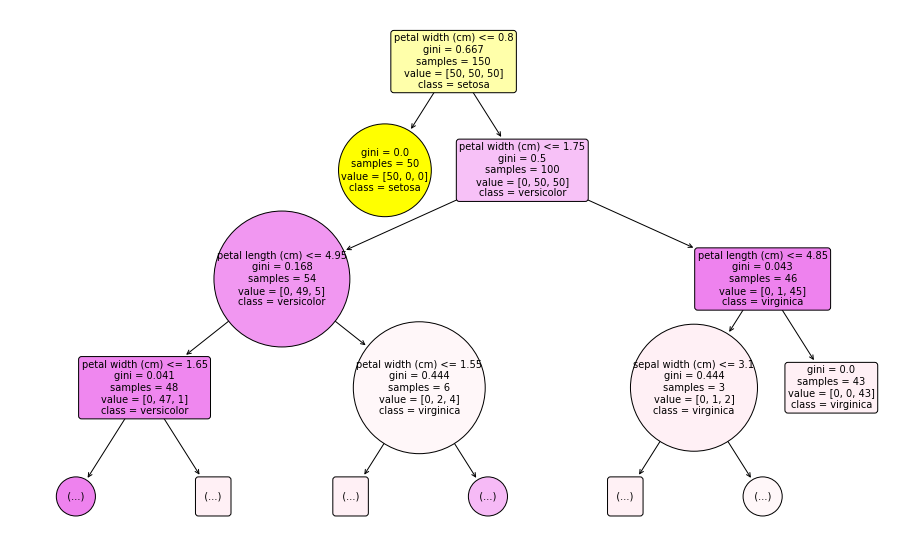

In [ ]:
from matplotlib.colors import to_rgb
%matplotlib inline
fig, ax = plt.subplots(figsize=(16, 10))
ax = tree.plot_tree(dt, max_depth = 3, 
                    filled=True, 
                    feature_names = iris.feature_names, 
                    class_names = iris.target_names)

i = 0
colors = ["yellow", "violet", "lavenderblush"]
for artist, impurity, value in zip(ax, dt.tree_.impurity, dt.tree_.value):
  r, g, b = to_rgb(colors[np.argmax(value)])
  # 코드가 길어서 i로 재 저장
  ip = impurity
  # print(ip + (1-ip)*r, ip + (1-ip)*g, ip + (1-ip)*b)
  if i % 2 == 0:
    # set_boxtyle 적용
    ax[i].get_bbox_patch().set_boxstyle("round", pad=0.3)
    ax[i].get_bbox_patch().set_facecolor((ip + (1-ip)*r, ip + (1-ip)*g, ip + (1-ip)*b))
    ax[i].get_bbox_patch().set_edgecolor('black')  
  else:
    ax[i].get_bbox_patch().set_boxstyle("circle", pad=0.3)
    ax[i].get_bbox_patch().set_facecolor((ip + (1-ip)*r, ip + (1-ip)*g, ip + (1-ip)*b))
    ax[i].get_bbox_patch().set_edgecolor('black')   
  i = i+1